Model Development

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# load data and store in dataframe df
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Linear Regression

In [3]:
# load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
# Create the linear regression object
lm = LinearRegression()
lm

# create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model using highway-mpg
lm.fit(X,Y)

# output a prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [5]:
# value of the intercept
lm.intercept_

38423.305858157386

In [6]:
# value of the Slope
lm.coef_

array([-821.73337832])

In [7]:
# Question 1
# Create a linear regression object
lm1 = LinearRegression()

# Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable
lm1.fit(df[['highway-mpg']], df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Slope 
lm1.coef_

array([[-821.73337832]])

In [9]:
# Intercept
lm1.intercept_

array([38423.30585816])

Multiple Linear Regression

In [10]:
# develop a model
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# value of the intercept
lm.intercept_

-15806.624626329198

In [12]:
# values of the coefficients
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [13]:
# Question 2
# Create and train a Multiple Linear Regression model "lm2" where the response variable is price, 
# and the predictor variable is 'normalized-losses' and 'highway-mpg'
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Find the coefficient of the model
lm2.coef_

array([   1.49789586, -820.45434016])

Model Evaluation using Visualization

In [15]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

Regression Plot

(0, 48155.28880610349)

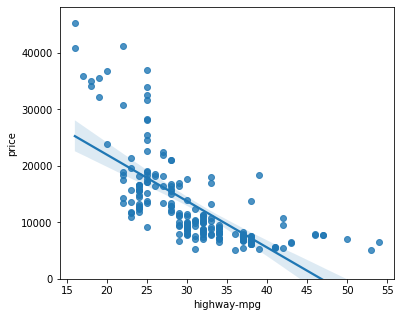

In [16]:
# visualize Horsepower as potential predictor variable of price
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47414.1133554084)

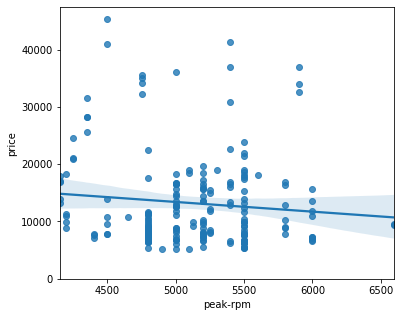

In [17]:
# regression plot of "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [18]:
# The variable "highway-mpg" has a stronger correlation with "price", 
# it is approximate -0.704692  compared to   "peak-rpm" which is approximately -0.101616. 
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Residual Plot

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

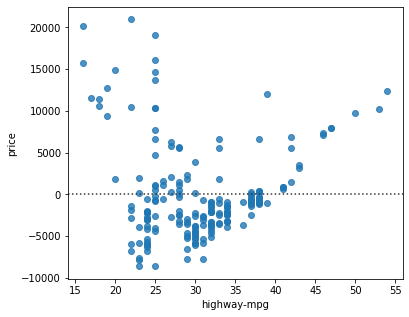

In [19]:
# Plotting residual plot
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

Multiple Linear Regression

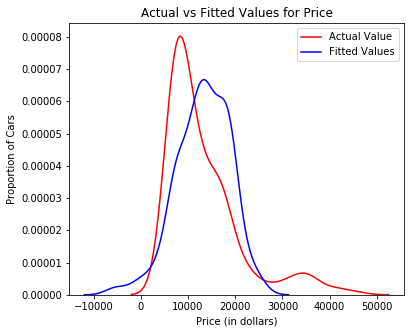

In [20]:
# make a prediction
Y_hat = lm.predict(Z)

# Distribution plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Polynomial Regression and Pipelines

In [21]:
# function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [22]:
# get the variables
x = df['highway-mpg']
y = df['price']

#  fit the polynomial using the function polyfit, 
# then use the function poly1d to display the polynomial function
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


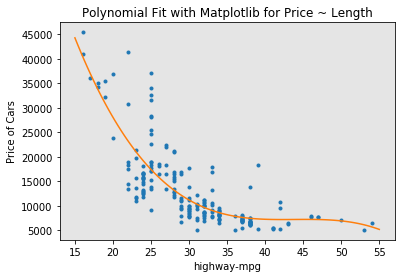

In [23]:
# plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [24]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


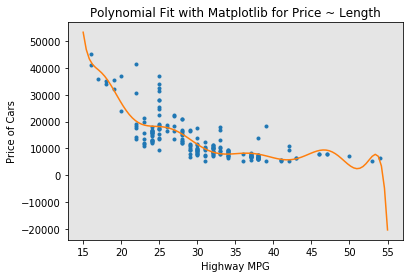

In [25]:
# Question 4: Create 11 order polynomial model with the variables x and y from above?
# calculate polynomial
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

Perform a polynomial transform on multiple features

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# original data
Z.shape

(201, 4)

In [28]:
# create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)

# transform
Z_pr=pr.fit_transform(Z)

# transformed data
Z_pr.shape

(201, 15)

Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
# create the pipeline, 
# by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [31]:
# normalize the data, perform a transform and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [32]:
# normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [33]:
# Question 5:
# Create a pipeline that Standardizes the data, 
# then perform prediction using a linear regression model using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

Measures for In-Sample Evaluation

Model 1: Simple Linear Regression

In [34]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [35]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [36]:
# import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

In [37]:
# compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


Model 2: Multiple Linear Regression

In [38]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [39]:
# produce a prediction
Y_predict_multifit = lm.predict(Z)

# compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [40]:
# import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [41]:
# apply the function to get the value of r^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [42]:
# calculate the MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

Part 5: Prediction and Decision Making

In [43]:
# Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model
lm.fit(X, Y)

# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

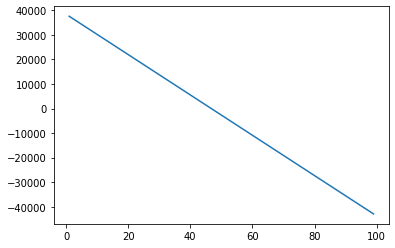

In [44]:
# plot the data
plt.plot(new_input, yhat)
plt.show()